In [1]:
import keras
print(keras.__version__)

3.10.0


In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Dense

 

Load the Dataset

In [4]:
#"E:\handwrittenDigits\Data\mnist_test.csv"

tr1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_train.csv")
te1 = pd.read_csv("E:/handwrittenDigits/Data/mnist_test.csv")

df = pd.concat([tr1, te1])

print(df.shape)

(70000, 785)


In [5]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = df['label'].values 
print(y.shape)
#x = df.loc[:, df.columns != 'label']

x = df.drop('label', axis=1).values.reshape(-1, 28, 28)
print(x.shape)

(70000,)
(70000, 28, 28)


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(49000, 28, 28) (49000,)
(21000, 28, 28) (21000,)


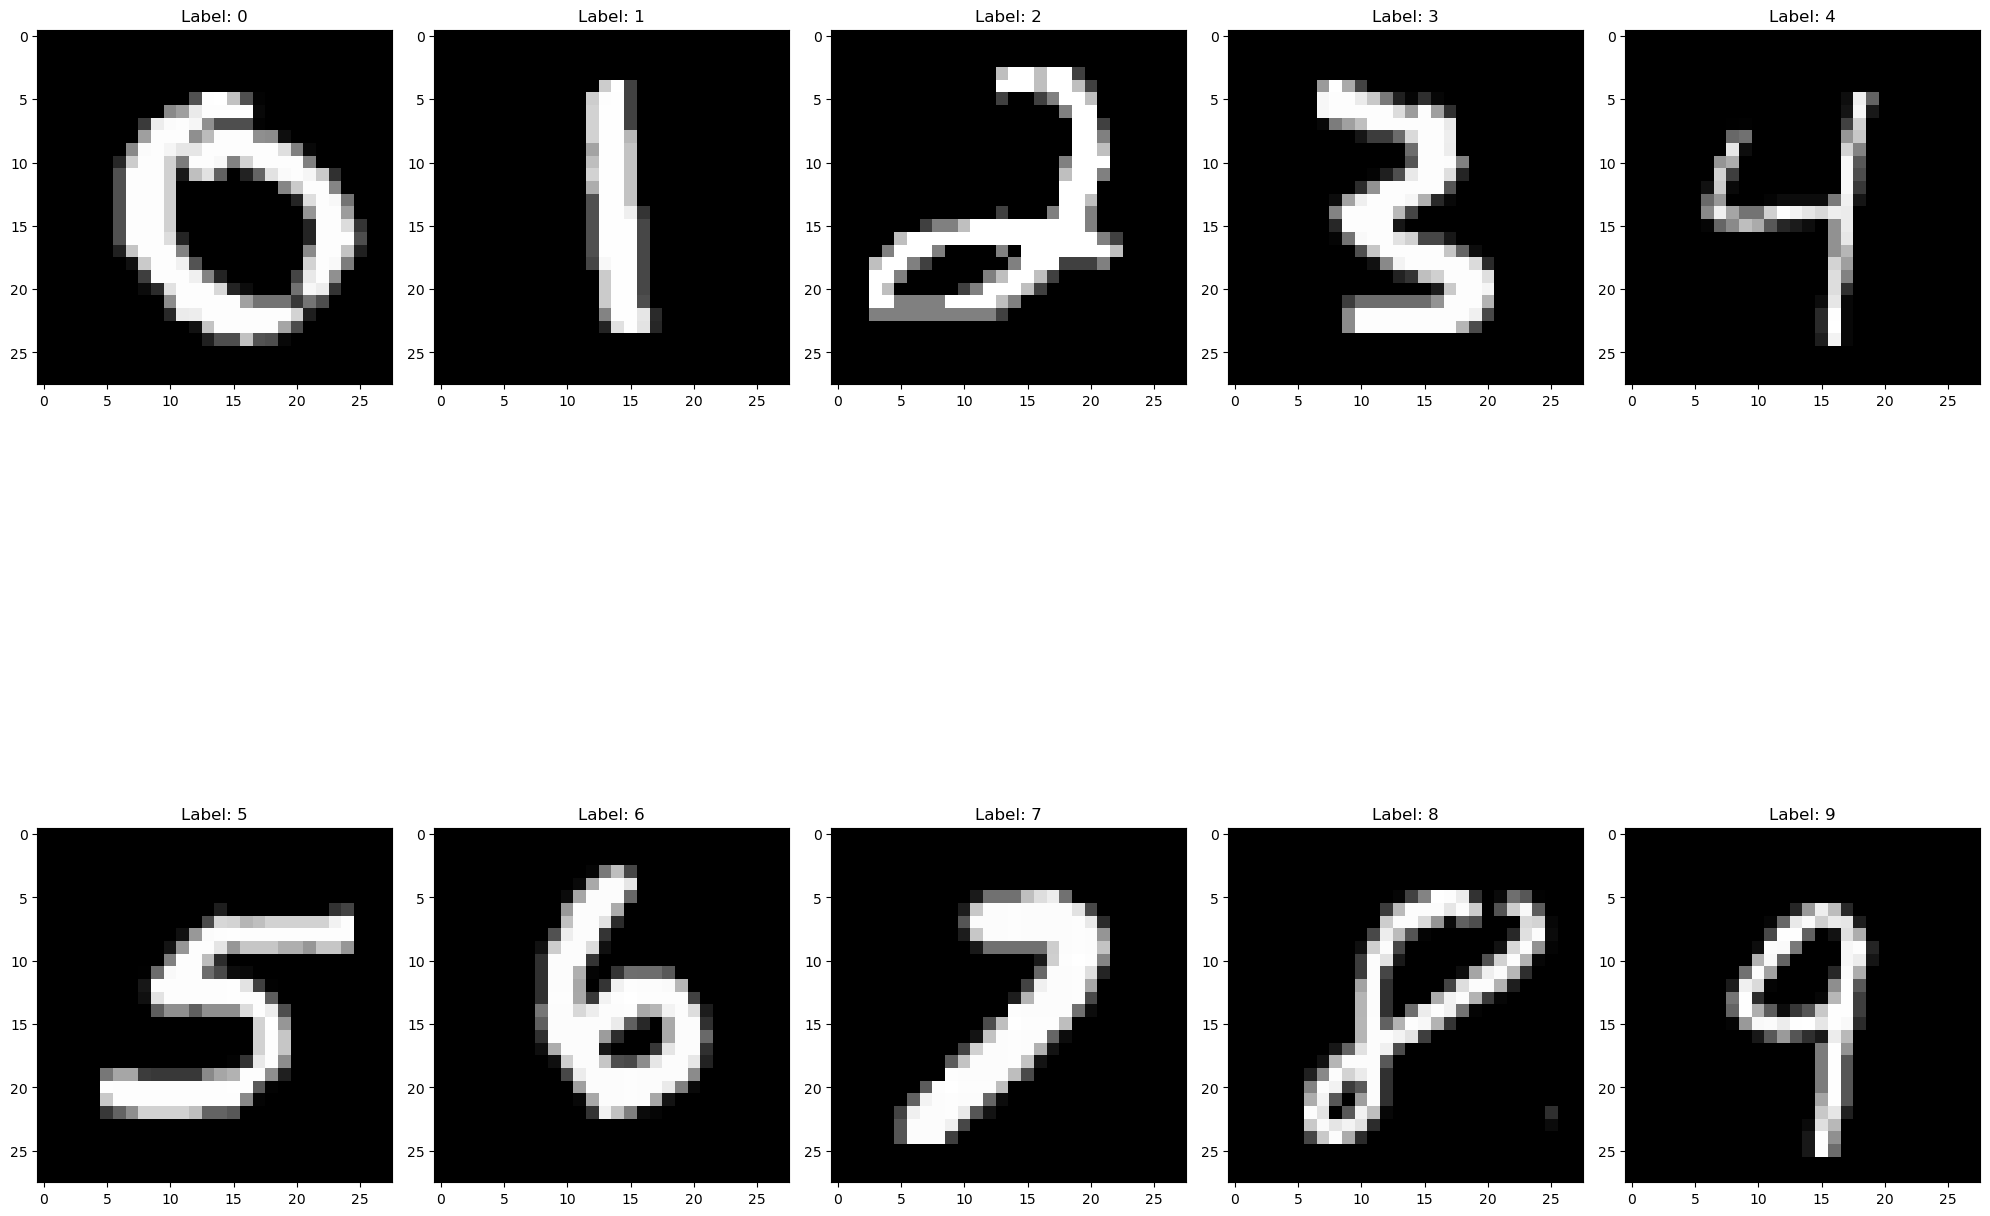

In [9]:
plt.figure(figsize=(20,20))

for digit in range(0,10):
    i = np.where(y==digit)[0]
    r = np.random.choice(i)
    plt.subplot(2,5, digit+1)
    plt.imshow(x[r], cmap='gray')
    plt.title(f'Label: {digit}')
plt.tight_layout()
plt.show()

In [10]:
y_train.shape

(49000,)

In [11]:
#to convert each digit into a 1d vector
d = 10
y_train = keras.utils.to_categorical(y_train, d)
y_test = keras.utils.to_categorical(y_test, d)

for i in range(10):
    print(y_train[i])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [14]:
###lmaoaooaoao (49000, 10, 10, 10, 10) HOW THE HELLY

In [15]:
#time for normalisation

x_train = x_train/255.5
x_test = x_test/255.5

print(x_train.shape)
print(x_test.shape)

(49000, 28, 28)
(21000, 28, 28)


In [16]:
#28, 28 nadaaa we need 784, so flatten!!!!!!!
#trallalero = x_train
#trallala = x_test

x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)

print(x_train.shape)
print(x_test.shape)

(49000, 784)
(21000, 784)


In [17]:
#it's modelling time babyyyyy
#used all 3 for learning. will keep only one later

In [30]:
import random
activation_function = ['relu', 'sigmoid', 'tanh']
hide_and_seek=[2,3]
nodes1=[100,150]
nodes2=[150,100]

models=[]

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        
        model=Sequential()
        
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        
        for ii in range(layers):
            model.add(Dense(units=nodes1[ii], activation= activation_function[i]))
            
        model.add(Dense(units=10, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        
        model.summary()
        print()

for i in range(0,3):
    for layers in range(2):
        print("activation:", activation_function[i])
        model=Sequential()
        model.add(Dense(input_shape = (784,), units=784,  activation=activation_function[i]))
        for ii in range(layers):
            model.add(Dense(units=nodes2[ii], activation= activation_function[i]))
        model.add(Dense(units=10, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        models.append(model)
        model.summary()
        print()

for i in range(0,3):
    custom_activation = random.choice(activation_function)
    print("activation:", custom_activation)
    model = Sequential() 
    
    model.add(Dense(input_shape = (784,), units=784,  activation=custom_activation))
    l1 = random.randint(70,120)
    l2 = 150 - l1

    model.add(Dense(units=l1, activation=custom_activation))
    model.add(Dense(units=l2, activation=custom_activation))

    model.add(Dense(units=10,activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    models.append(model)
    model.summary()
    print()

activation: relu


C:\Users\Dell\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 694,950 (2.65 MB)

 Trainable params: 694,950 (2.65 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)


activation: tanh


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 150)                 │         117,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 734,700 (2.80 MB)

 Trainable params: 734,700 (2.80 MB)

 Non-trainable params: 0 (0.00 B)


activation: sigmoid


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 79)                  │          62,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 71)                  │           5,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             720 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,855 (2.61 MB)

 Trainable params: 683,855 (2.61 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 72)                  │          56,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 78)                  │           5,694 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             790 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 678,444 (2.59 MB)

 Trainable params: 678,444 (2.59 MB)

 Non-trainable params: 0 (0.00 B)


activation: relu


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 107)                 │          83,995 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 43)                  │           4,644 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             440 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 704,519 (2.69 MB)

 Trainable params: 704,519 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
epochs = 10

for i in range(len(models)):
    print("fit:",i+1)
    models[i].fit(x=x_train, y=y_train, epochs=epochs)
    print()

fit: 1
Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8944 - loss: 0.3530
Epoch 2/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9753 - loss: 0.0810
Epoch 3/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9850 - loss: 0.0457
Epoch 4/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9902 - loss: 0.0319
Epoch 5/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9923 - loss: 0.0245
Epoch 6/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9938 - loss: 0.0194
Epoch 7/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9953 - loss: 0.0140
Epoch 8/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9962 - loss: 0.0126
Epoch 9/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9978 - loss: 0.0080
Epoch 10/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9968 - loss: 0.0100

fit: 2
Epoch 1/10
1532/1532 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8974 - loss: 0.3394
Epoch

In [34]:
print(x_test.shape,y_test.shape)

(21000, 784) (21000, 10)


In [36]:
tloss =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
taccuracy =  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for i in range(len(models)):
    tloss[i], taccuracy[i] = models[i].evaluate(x_test, y_test)
    print("loss for model {} : {}, accuracy for model {} : {}".format(i+1, tloss[i], i+1, taccuracy[i]))
    print()

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9786 - loss: 0.0922
loss for model 1 : 0.08978907763957977, accuracy for model 1 : 0.9805238246917725

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9793 - loss: 0.0934
loss for model 2 : 0.09830031543970108, accuracy for model 2 : 0.9794762134552002

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9791 - loss: 0.0737
loss for model 3 : 0.0739312544465065, accuracy for model 3 : 0.9796666502952576

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9747 - loss: 0.0969
loss for model 4 : 0.09469535201787949, accuracy for model 4 : 0.975761890411377

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9722 - loss: 0.1142
loss for model 5 : 0.10587910562753677, accuracy for model 5 : 0.9744762182235718

657/657 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9705 - loss: 0.1052
loss for model 6 : 0.10068703442811966, accuracy for model 6 : 0.9712380766868591

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0

In [40]:
predict_y = []
preditct_y_classes = []

for i,model in enumerate(models):
    print(f"Model:{i+1}")
    yp = model.predict(x_test,verbose=1)
    preditct_y_class = np.argmax(yp,axis=1)

    predict_y.append(yp)
    preditct_y_classes.append(preditct_y_class)

    print(predict_y)
    print(preditct_y_classes)
    print()

Model:1
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[array([[5.3465535e-16, 1.0000000e+00, 1.1735249e-10, ..., 2.9916382e-08,
        1.0469024e-11, 5.3421599e-20],
       [9.9999952e-01, 6.3090240e-12, 7.0353266e-08, ..., 1.0320211e-10,
        2.5613604e-18, 1.2291793e-10],
       [2.4814429e-15, 2.8840830e-17, 1.0000000e+00, ..., 1.8964103e-12,
        6.7640714e-15, 1.9418932e-20],
       ...,
       [1.1764193e-12, 6.2099292e-14, 3.9890185e-11, ..., 8.0162411e-17,
        8.6739416e-09, 1.1924234e-14],
       [5.9572153e-15, 4.4022429e-20, 2.2481857e-15, ..., 1.0000000e+00,
        9.2830344e-21, 1.7742618e-13],
       [3.2386843e-11, 2.5195078e-04, 6.8639827e-09, ..., 2.2697693e-04,
        6.6837390e-07, 9.9951947e-01]], dtype=float32)]
[array([1, 0, 2, ..., 6, 7, 9], dtype=int64)]

Model:2
657/657 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[array([[5.3465535e-16, 1.0000000e+00, 1.1735249e-10, ..., 2.9916382e-08,
        1.0469024e-11, 5.3421599e-20],
       [9.9999952e-01, 6.3090240e-12, 7.

Model 1: Predicted = 9, True = 9


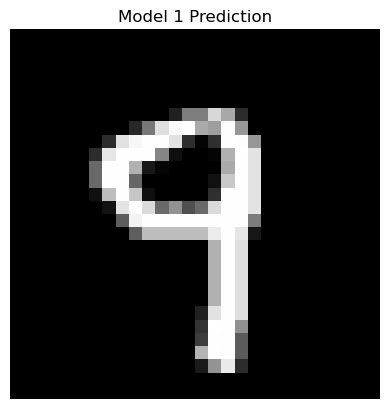

Model 2: Predicted = 8, True = 8


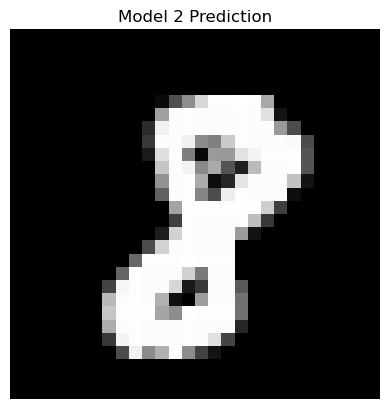

Model 3: Predicted = 7, True = 7


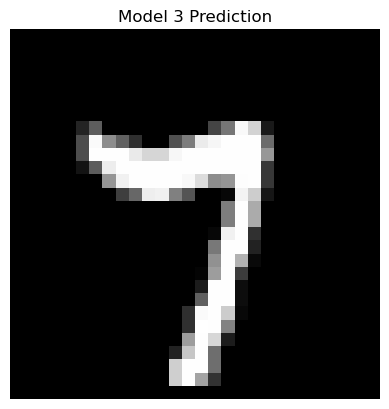

Model 4: Predicted = 9, True = 9


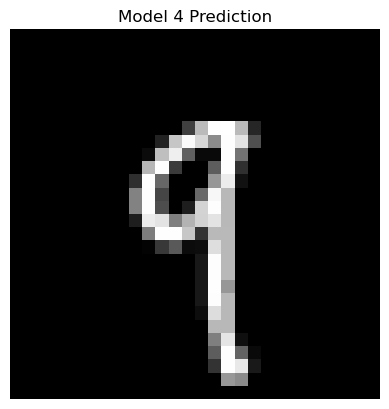

Model 5: Predicted = 4, True = 4


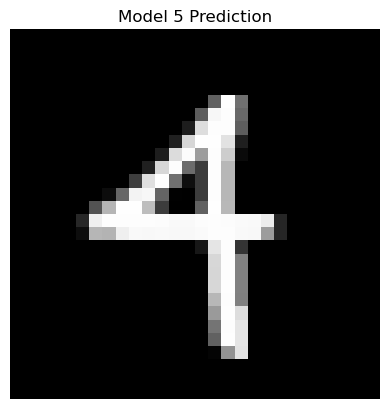

Model 6: Predicted = 7, True = 7


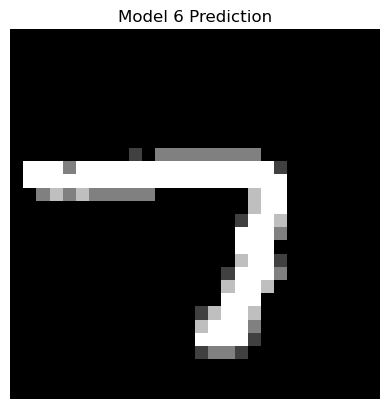

Model 7: Predicted = 6, True = 6


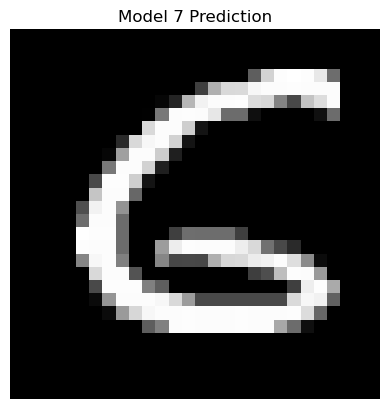

Model 8: Predicted = 6, True = 6


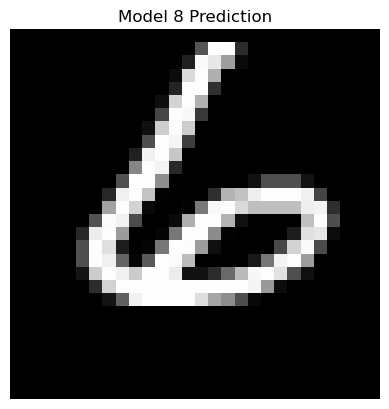

Model 9: Predicted = 9, True = 9


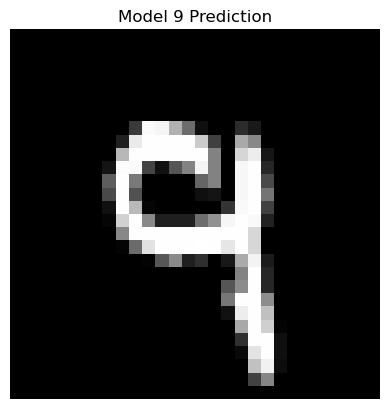

Model 10: Predicted = 9, True = 9


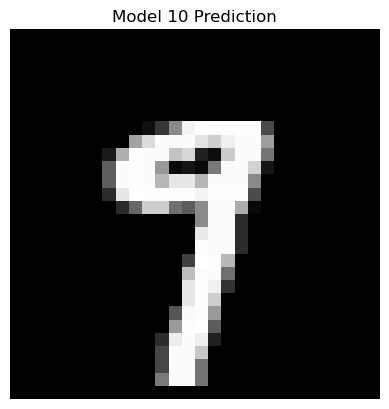

Model 11: Predicted = 2, True = 2


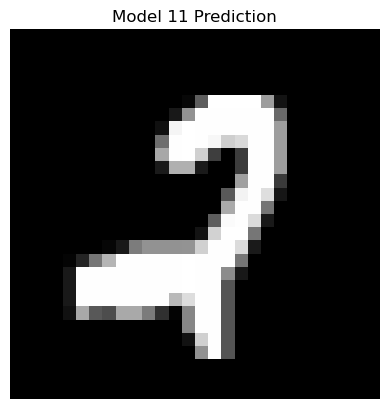

Model 12: Predicted = 5, True = 5


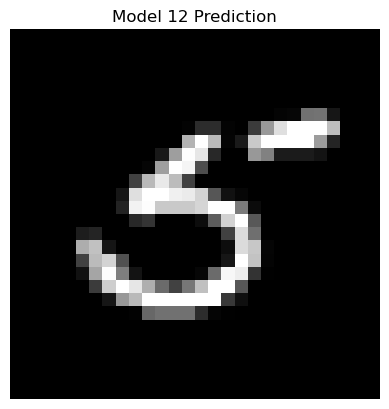

Model 13: Predicted = 4, True = 4


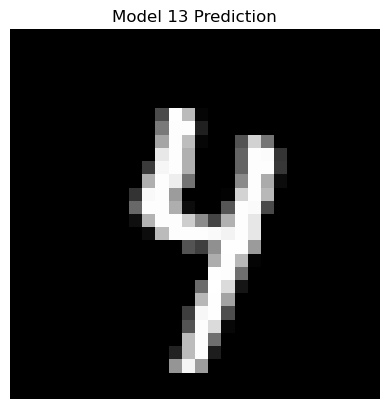

Model 14: Predicted = 3, True = 3


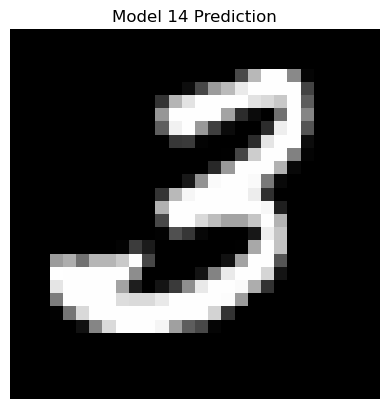

Model 15: Predicted = 8, True = 8


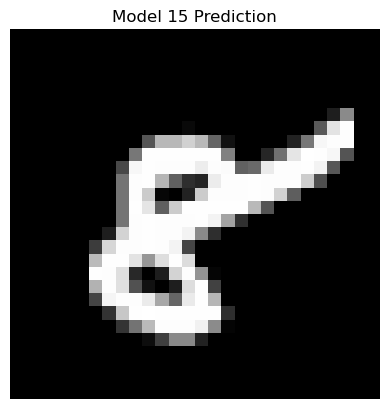

In [42]:
for i, model in enumerate(models):
    rand_idx = np.random.randint(len(x_test))

    img = x_test[rand_idx].reshape(28, 28)
    true_label = np.argmax(y_test[rand_idx])

    pred_label = preditct_y_classes[i][rand_idx]

    print(f"Model {i + 1}: Predicted = {pred_label}, True = {true_label}")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f"Model {i+1} Prediction")
    plt.show()

In [46]:
sorted_models = sorted(zip(models, taccuracy), key=lambda x: x[1], reverse=True)
for name, acc in sorted_models:
    print(f"{name}: {acc:.4f}")

<Sequential name=sequential, built=True>: 0.9805
<Sequential name=sequential_9, built=True>: 0.9799
<Sequential name=sequential_2, built=True>: 0.9797
<Sequential name=sequential_1, built=True>: 0.9795
<Sequential name=sequential_7, built=True>: 0.9792
<Sequential name=sequential_8, built=True>: 0.9788
<Sequential name=sequential_6, built=True>: 0.9783
<Sequential name=sequential_13, built=True>: 0.9782
<Sequential name=sequential_14, built=True>: 0.9771
<Sequential name=sequential_12, built=True>: 0.9759
<Sequential name=sequential_3, built=True>: 0.9758
<Sequential name=sequential_4, built=True>: 0.9745
<Sequential name=sequential_10, built=True>: 0.9742
<Sequential name=sequential_5, built=True>: 0.9712
<Sequential name=sequential_11, built=True>: 0.9687


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted digit: 5


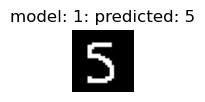

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
predicted digit: 5


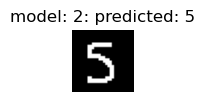

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
predicted digit: 5


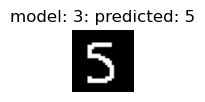

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
predicted digit: 5


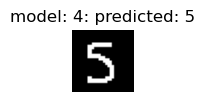

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted digit: 5


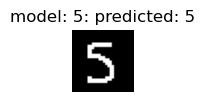

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
predicted digit: 5


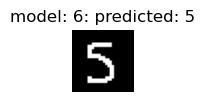

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted digit: 3


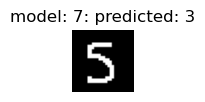

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
predicted digit: 5


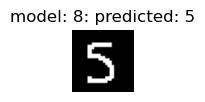

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
predicted digit: 5


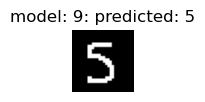

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
predicted digit: 5


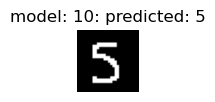

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
predicted digit: 5


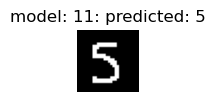

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
predicted digit: 5


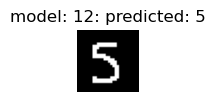

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
predicted digit: 3


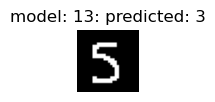

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
predicted digit: 5


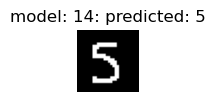

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
predicted digit: 5


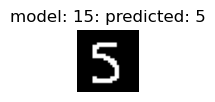

In [52]:

from PIL import Image

image_path = "C:/Users/Dell/Downloads/pixil-frame-0 (2).png"
img = Image.open(image_path).convert('L')

img=img.resize((28,28))

img_arr = np.array(img)

img_arr = img_arr/255.0

img_arr = (img_arr > 0.3).astype(float)

img_arr = img_arr.reshape(1, 784)

for i in range(len(models)):
    pred = models[i].predict(img_arr)
    
    pred_class = np.argmax(pred)
    
    print("predicted digit:",pred_class)
    plt.figure(figsize=(4,4))
    plt.subplot(2,5,digit+1)
   
    plt.imshow(img_arr.reshape(28,28), cmap='gray')
    plt.title(f"model: {i+1}: predicted: {pred_class}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [54]:

for i, prob in enumerate(pred[0]):
    print(f"Digit {i}: {prob:.4f}")


Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.2629
Digit 4: 0.0000
Digit 5: 0.7369
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0002
